In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
random_state = np.random.RandomState(seed = 1)

In [126]:
X = np.concatenate([random_state.normal(-1,1.5,350),
                    random_state.normal(0,1,500),
                    random_state.normal(3,0.5,150)]).reshape(-1,1)

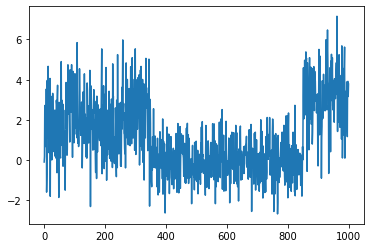

In [127]:
plt.plot(np.concatenate([random_state.normal(2,1.5,350),
                    random_state.normal(0,1,500),
                    random_state.normal(3,1.5,150)]))

In [128]:
N = np.arange(1,11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

In [129]:
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

In [130]:
M_best = models[np.argmin(BIC)]

In [131]:
M_best

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [132]:
x = np.linspace(-6,6,1000)
logprob = M_best.score_samples(x.reshape(-1,1))
responsibilities = M_best.predict_proba(x.reshape(-1,1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

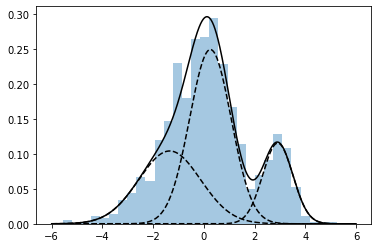

In [133]:
plt.hist(X,30,density=True,histtype='stepfilled',alpha=0.4)
plt.plot(x,pdf,'-k')
plt.plot(x,pdf_individual,'--k')

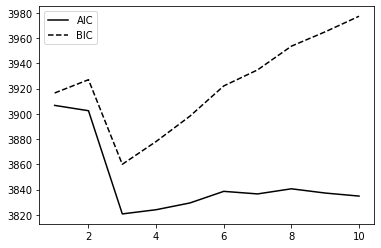

In [134]:
plt.plot(N,AIC,'-k',label='AIC')
plt.plot(N,BIC,'--k',label='BIC')
plt.legend()

In [139]:
p = responsibilities
p = p[:,(1,0,2)]
p = p.cumsum(1).T

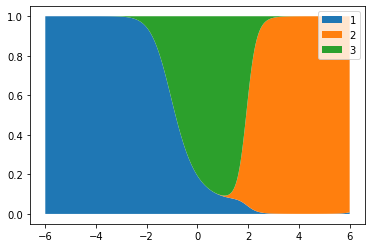

In [140]:
plt.fill_between(x,0,p[0],label='1')
plt.fill_between(x,p[0],p[1],label='2')
plt.fill_between(x,p[1],1,label='3')
plt.legend()